<a href="https://colab.research.google.com/github/ThinkSmartFast/AI-Driven-Linguistic-Analysis-of-Political-Speeches/blob/main/pronouns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


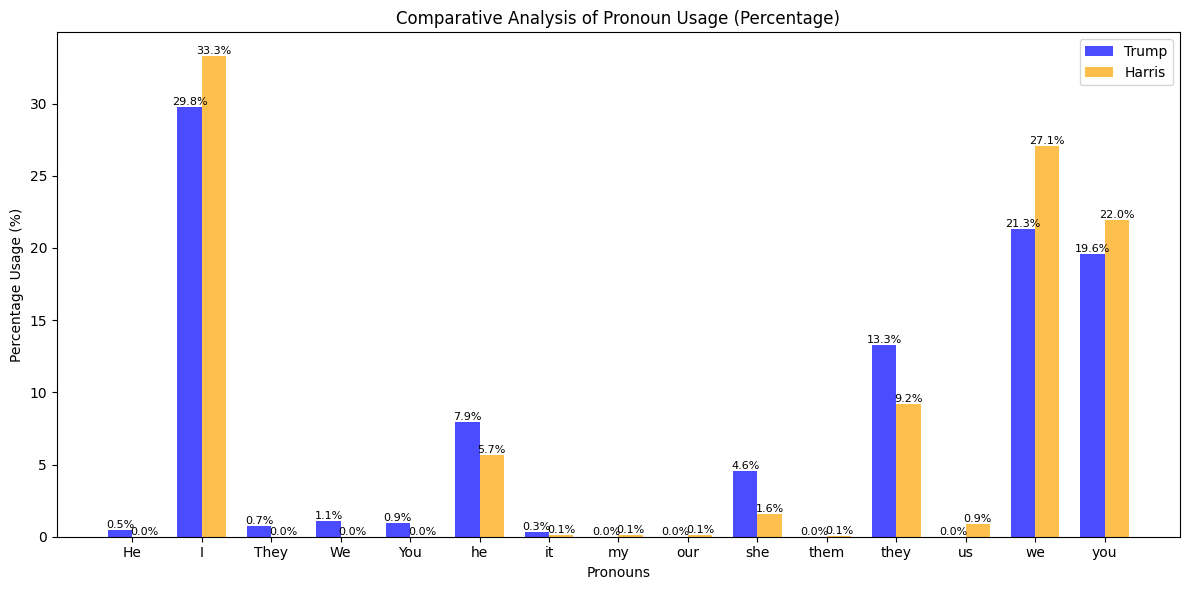

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = "/content/drive/My Drive/GenAI/"
os.chdir(file_path)

trump_data_file = "Trump_all_speeches_results.json"
harris_data_file = "Harris_all_speeches_results.json"

# Load the JSON data
with open(trump_data_file, "r") as file:
    trump_all_data = json.load(file)
    trump_data = trump_all_data.get("Pronouns")
with open(harris_data_file, "r") as file:
    harris_all_data = json.load(file)
    harris_data = harris_all_data.get("Pronouns")

# Combine keys from both datasets to ensure all pronouns are represented
all_pronouns = sorted(set(trump_data.keys()).union(harris_data.keys()))

# Calculate total counts and percentages
trump_total = sum(trump_data.values())
harris_total = sum(harris_data.values())

trump_percentages = [
    (trump_data.get(pronoun, 0) / trump_total) * 100 for pronoun in all_pronouns
]
harris_percentages = [
    (harris_data.get(pronoun, 0) / harris_total) * 100 for pronoun in all_pronouns
]

# Bar chart setup
x = np.arange(len(all_pronouns))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(
    x - width / 2, trump_percentages, width, label="Trump", color="blue", alpha=0.7
)
bars2 = ax.bar(
    x + width / 2, harris_percentages, width, label="Harris", color="orange", alpha=0.7
)

# Add labels, title, and legend
ax.set_xlabel("Pronouns")
ax.set_ylabel("Percentage Usage (%)")
ax.set_title("Comparative Analysis of Pronoun Usage (Percentage)")
ax.set_xticks(x)
ax.set_xticklabels(all_pronouns)
ax.legend()

# Add percentage labels above bars for better readability
def add_percentage_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.1f}%",
            ha="center",
            va="bottom",
            fontsize=8
        )

add_percentage_labels(bars1)
add_percentage_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()
